In [1]:
!wget "humancomputation.com/blog/wp-content/uploads/2016/11/Experiment.png"

--2021-01-08 14:56:08--  http://humancomputation.com/blog/wp-content/uploads/2016/11/Experiment.png
Resolving humancomputation.com (humancomputation.com)... 104.196.55.96
Connecting to humancomputation.com (humancomputation.com)|104.196.55.96|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://humancomputation.com/blog/wp-content/uploads/2016/11/Experiment.png [following]
--2021-01-08 14:56:08--  https://humancomputation.com/blog/wp-content/uploads/2016/11/Experiment.png
Connecting to humancomputation.com (humancomputation.com)|104.196.55.96|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://blog.humancomputation.com/wp-content/uploads/2016/11/Experiment.png [following]
--2021-01-08 14:56:09--  https://blog.humancomputation.com/wp-content/uploads/2016/11/Experiment.png
Resolving blog.humancomputation.com (blog.humancomputation.com)... 104.196.55.96
Connecting to blog.humancomputation.com (blog

## Word Embedding Magic
Acabei de ver esses dados e percebi que isso é a representação de palavras em vetores GloVe de 50 dimensões. Neste caderno, tentarei mostrar um pouco da magia desse conjunto de dados e a importância que ele deve merecer!
![](https://humancomputation.com/blog/wp-content/uploads/2016/11/Experiment.png)

Pic Credit : https://humancomputation.com



**Introdução**

A incorporação de palavras desempenha um papel importante no processamento de linguagem natural. Jogando a representação vetorial quente para fora da janela, esse recurso de aprendizagem mapeia palavras ou frases do vocabulário para vetores de números reais. GloVe é uma das abordagens em que cada palavra é mapeada para um vetor de 50 dimensões. Esse vetor pode ser usado para aprender a semântica de palavras como Homem é Mulher como Rei é para Rainha. Ou Homem + Mulher = Mulher. Essa incorporação desempenha um papel importante em muitos aplicativos. É também um tipo de aprendizagem por transferência, onde essas incorporações são tiradas de um grande corpo de dados e podem ser usadas em um conjunto de dados menor.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("glove"))

['glove.6B.50d.txt']


In [4]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

**Read the File**

Vamos primeiro carregar o arquivo. O arquivo é formatado da seguinte forma:

word1 ["embedding vector"]

word2 ["embedding vector"]

-- e assim por diante

Vamos ler o conjunto de dados para mostrar a magia da incorporação

In [5]:
vocab, w2v = read_data("glove/glove.6B.50d.txt")

Total Words in DataSet: 400000


# APLICAÇÃO: Pontuação de similaridade

Vamos tentar obter uma pontuação similar entre palavras semelhantes, como Rei e Rainha ou Bebê e mãe, etc.

** Métricas de distância **

Assim, cada palavra é convertida em um vetor e para verificar a proximidade podemos usar qualquer pontuação de similaridade como L2 ou cosseno. Como as semelhanças de cosseno são mais usadas, vamos implementar a similaridade de cosseno.

Definimos similaridade de cosseno da seguinte forma:
$$\text{Cos Similarity(u, v)} = \frac {u . v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

In [6]:
def cos_sim(u,v):
    """
    u: vector of 1st word
    v: vector of 2nd Word
    """
    numerator_ = u.dot(v)
    denominator_= np.sqrt(np.sum(np.square(u))) * np.sqrt(np.sum(np.square(v)))
    return numerator_/denominator_

** Examples for Fun**

In [7]:
all_words = w2v.keys()

In [8]:
print("Similarity Score of King and Queen",cos_sim(w2v['king'],w2v['queen']))
print("Similarity Score of Mother and Pizza",cos_sim(w2v['mother'],w2v['pizza']))
print("Similarity Score of Man and Pizza",cos_sim(w2v['man'],w2v['pizza']))
print("Similarity Score of Mother and baby",cos_sim(w2v['mother'],w2v['baby']))

Similarity Score of King and Queen 0.7839043010964117
Similarity Score of Mother and Pizza 0.2557054340137487
Similarity Score of Man and Pizza 0.3399827858775286
Similarity Score of Mother and baby 0.7502298772361724


# Visualization of Word Embedding

In [9]:
def return_matrix(random_words,dim =50):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = w2v[word]
        i +=1
    return word_matrix

## Visualization Using PCA

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


In [11]:
random_words = ['man','woman','king','queen','microwave','baby','boy','girl','pizza','royal','mother','father','doctor','cook','throne']
return_matrix_ = return_matrix(random_words)
pca_ = PCA(n_components=2)
viz_data = pca_.fit_transform(return_matrix_) 

(-5.0, 6.0)

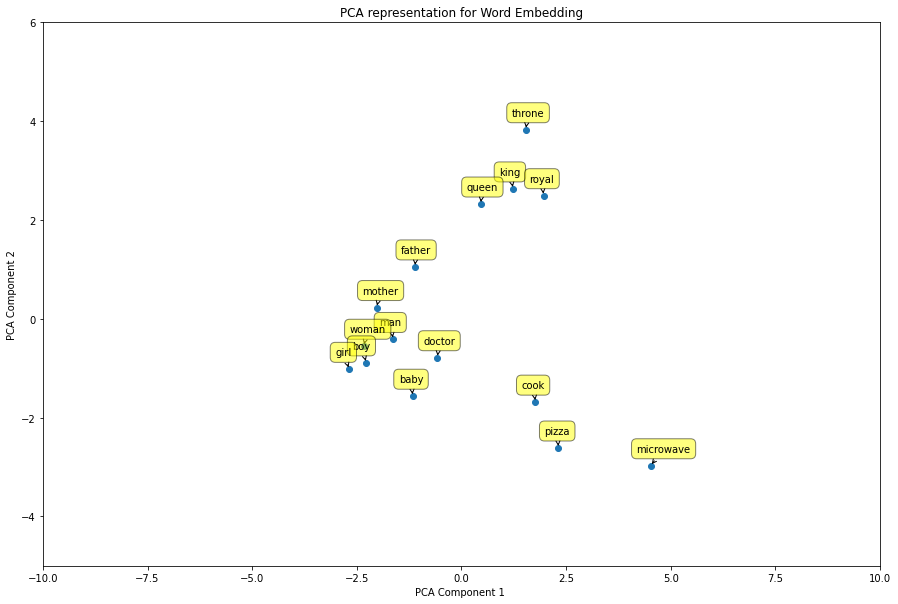

In [12]:
plt.scatter(viz_data[:,0],viz_data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,viz_data[:,0],viz_data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-10,10)
plt.ylim(-5,6)

## Visualization using T-SNE 

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
tsne_results = tsne.fit_transform(return_matrix_)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 1.360638
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.619662
[t-SNE] KL divergence after 1000 iterations: 0.159148


Text(0.5, 1.0, 'TSNE representation for Word Embedding')

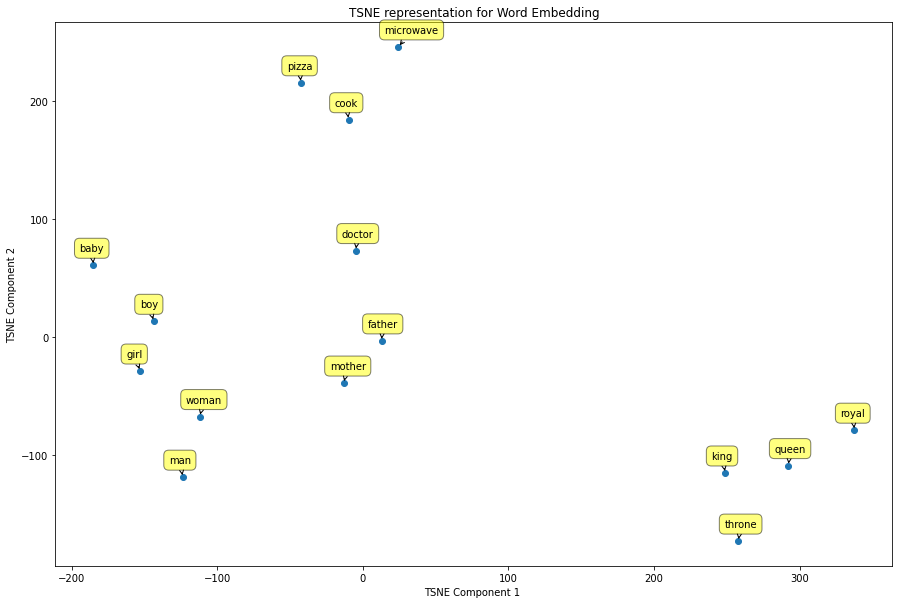

In [14]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,tsne_results[:,0],tsne_results[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('TSNE Component 1 ')
plt.ylabel('TSNE Component 2')
plt.title('TSNE representation for Word Embedding')

Podemos ver como as palavras relacionadas são agrupadas. Incrível certo !!

# Aplicação: Analogia

Vamos tentar outra aplicação em que tentamos a analogia, ou seja, "O homem está para a mulher como o rei está para?" ou "Índia está para Delhi como o Japão está?".

A intuição é que a nova palavra deve estar próxima de (palavra3 - (palavra1 - palavra2)) onde palavra3 = médico, palavra1 = cozinhar, palavra1 = pizza em "cozinhar é para pizza como o médico é?".

In [15]:
def find_w4(word1,word2,word3, w2v):
    """
    """
    word_list = w2v.keys()
    max_sim = -1000
    #Make Sure they are lower
    word1,word2,word3 = word1.lower(),word2.lower(),word3.lower()
    diff_vec = w2v[word3] - (w2v[word1]-w2v[word2]) #word3 - (word1 - word2)
    for word in word_list:
        vec = w2v[word]
        sim_ = cos_sim(u=diff_vec,v=vec)
        if sim_ > max_sim:
            max_sim = sim_
            word_selected =  word
            
    return word_selected

In [16]:
print("King is to Queen as Man is to ",find_w4('king','queen','man',w2v))
print("Cook is to Pizza as Doctor is to ",find_w4('cook','pizza','doctor',w2v))
print("India is to Delhi as Japan is to ",find_w4('india','delhi','japan',w2v))
print("kid is to toy as doctor is to ",find_w4('kid','toy','doctor',w2v))

King is to Queen as Man is to  woman
Cook is to Pizza as Doctor is to  pizza
India is to Delhi as Japan is to  tokyo
kid is to toy as doctor is to  medical


** Cozinhe está para a pizza como o médico está para a pizza **

Doutor é a Pizza !! Haha .. Isso era um segredo, eu acho. Bem, o aprendizado de máquina pode ser engraçado.

![](https://9bf6ddc20002c5f1a946-ef07da46c7e506e973e0d9fa57c693df.ssl.cf1.rackcdn.com/636445631371205663+32594.png)